# Experimento: Porta dos Desesperados
## Aluna: Ana Carolina Tavares Sovat
## RA: 134867

Neste experimento pretendemos simular a situação discutida em sala de aula, repetindo o experimento múltiplas vezes para assim verificar qual é a melhor estratégia nessa situação.

A situação é a seguinte: em um programa de auditório, um dos jogos consiste em três portas fechadas, uma das quais esconde um prêmio.

In [1]:
import random

portas = ['A','B','C']

premio = random.choice(portas)

print("O prêmio está atrás da porta {}.".format(premio))

O prêmio está atrás da porta B.


O participante escolhe, ao acaso, uma das portas.

In [2]:
primeiraEscolha = random.choice(portas)

print("O participante escolheu a porta {}.".format(primeiraEscolha))

O participante escolheu a porta A.


Antes de revelar se o participante escolheu a porta certa, o apresentador abre uma segunda porta, que não foi escolhida, e revela que atrás dela não há um prêmio. Essa porta que é aberta, portanto, necessariamente não é a porta premiada, nem a porta escolhida pelo jogador.

In [3]:
sobrou = [a for a in portas if a not in premio and a not in primeiraEscolha]

aberta = random.choice(sobrou)

print("O apresentador abriu a porta {}.".format(aberta))

O apresentador abriu a porta C.


Nesse momento, é dada uma escolha ao participante. Ele pode continuar com a porta que escolheu, ou trocá-la pela outra porta fechada.

No final, se a porta escolhida for a porta certa, a estratégia escolhida pelo participante obteve sucesso.

In [16]:
opcao = [a for a in portas if a not in aberta and a not in primeiraEscolha]

print("A opção é trocar a porta escolhida (porta {}), pela porta {}.".format(primeiraEscolha,opcao[0]))
print()
troca = random.choice([True,False])

if troca:
    escolha = opcao[0]
    print("O participante escolheu trocar a porta.")
else:
    escolha = primeiraEscolha
    print("O participante escolheu manter sua porta.")

if escolha == premio:
    print("O participante ganhou o prêmio!")
else:
    print("O participante perdeu!")

A opção é trocar a porta escolhida (porta A), pela porta B.

O participante escolheu trocar a porta.
B
O participante ganhou o prêmio!


Este experimento busca determinar qual dessas estratégias tem maior chance de sucesso. Para tanto, pretendemos repetir o experimento múltiplas vezes, escolhendo cada vez uma das estratégias, e verificar qual é a proporção de sucessos para cada uma.

Para repetir o experimento muitas vezes, condensamos essa simulação feita até agora em uma só função. A função recebe o parâmetro "troca" (True/False), que decide se o participante troca ou não sua porta, e retorna "True", simbolizando o sucesso, ou "False", simbolizando o fracasso.

In [27]:
def experimento(troca):
    portas = ['A','B','C']
    premio = random.choice(portas)
    primeiraEscolha = random.choice(portas)
    sobrou = [a for a in portas if a not in premio and a not in primeiraEscolha]
    aberta = random.choice(sobrou)
    opcao = [a for a in portas if a not in aberta and a not in primeiraEscolha]
    if troca:
        escolha = opcao[0]
    else:
        escolha = primeiraEscolha
    if escolha==premio:
        return True
    else:
        return False
    

In [68]:
naotroca = []
for i in range(10000):
    naotroca.append(experimento(False))

acumuladonao = []
total = 0
for i in range(10000):
    if naotroca[i]:
        total = total + 1
    acumuladonao.append(total/(i+1))
    
print(total/10000)

0.3303


In [69]:
trocasim = []
for i in range(10000):
    trocasim.append(experimento(True))

acumuladosim = []
total = 0
for i in range(10000):
    if trocasim[i]:
        total = total + 1
    acumuladosim.append(total/(i+1))

print(total/10000)

0.6711


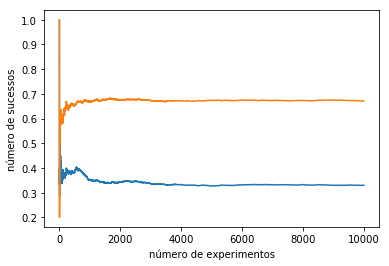

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot([a+1 for a in range(10000)],acumuladonao,[a+1 for a in range(10000)],acumuladosim)
plt.ylabel('número de sucessos')
plt.xlabel('número de experimentos')
plt.show()



A proporção de acertos conseguidos com a estratégia de trocar a porta pode ser vista no gráfico em laranja, enquanto a porporção relativa à estratégia de manter a porta pode ser vista em azul. Conforme o número de experimentos aumenta, ambas as proporções se aproximam de um valor constante, sendo o valor para a estratégia de trocar a porta (aproximadamente 66%) bem maior do que o valor da estratégia oposta (aproximadamente 33%).